In [21]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import skimage
import cv2
from scipy.ndimage.filters import convolve

Reading the image

(640, 640)


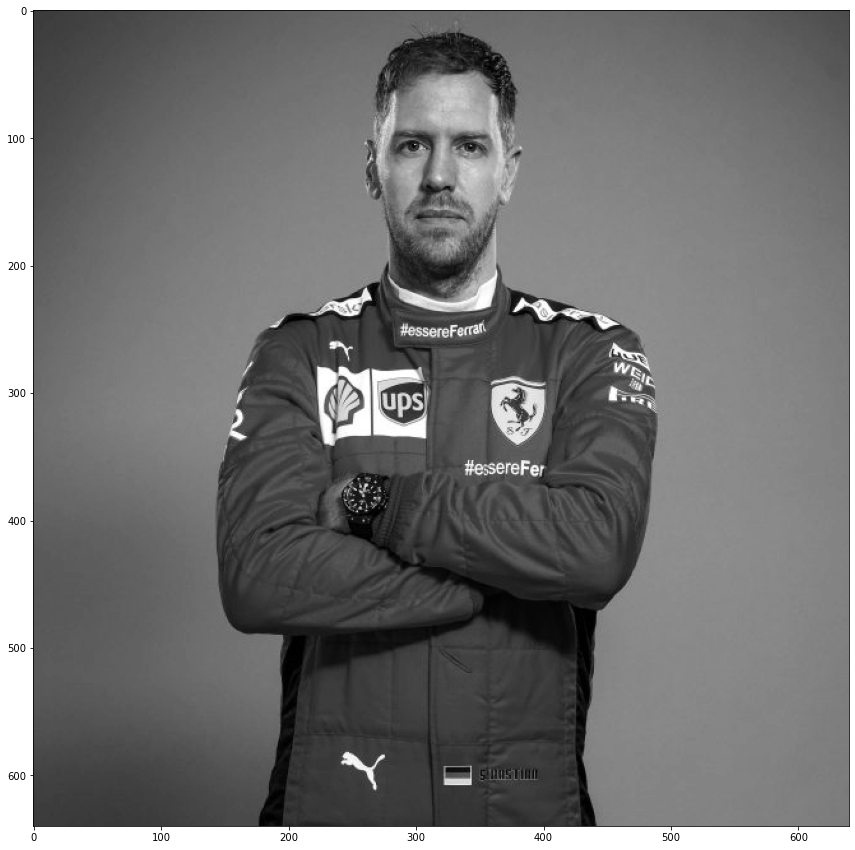

In [41]:
img = cv2.imread('images//seb.jpg',2)
print(img.shape)
plt.figure(figsize=(15,15))
plt.imshow(img,cmap="gray")
plt.show()

Canny Edge detection steps:
- Noise reduction;
- Gradient calculation;
- Non-maximum suppression;
- Double threshold;
- Edge Tracking by Hysteresis.

Step 1: Noise reduction - I am using linear gaussian kernels, which can reduce the number of multiplications.

In [113]:
def linearGaussianKernel(size,sigma):
    boundary_vals = int(size)//2
    x = np.arange(-boundary_vals,boundary_vals+1)
    normal = 1.0/(2.0*np.pi*sigma**2)
    kernel = np.exp(-((x**2) / (2.0*sigma**2))) * normal
    kernel = np.expand_dims(kernel,axis=0)
    return kernel

In [114]:
kernel_size = 5
sigma = 1.0
img_smoothed_horizontal = convolve(img,linearGaussianKernel(kernel_size,sigma))
img_smoothed = convolve(img_smoothed_horizontal,np.transpose(linearGaussianKernel(kernel_size,sigma)))

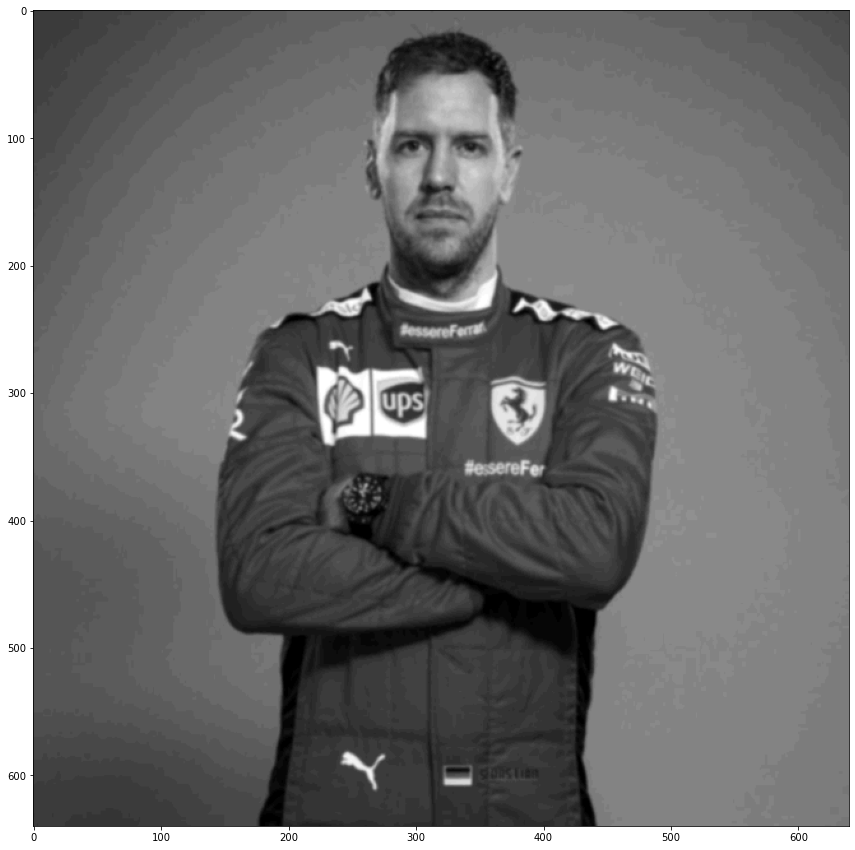

In [115]:
plt.figure(figsize=(15,15))
plt.imshow(img_smoothed,cmap="gray")
plt.show()

Step 2. Gradient calculation

In [117]:
def apply_sobel_filters(img):
    kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    ix = convolve(img,kx)
    iy = convolve(img,ky)
    G = np.sqrt(ix**2+iy**2)
    G = G/G.max() * 255.0
    
    angle = np.arctan2(iy,ix)
    
    return G,angle